In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

Text(0, 0.5, 'Inches')

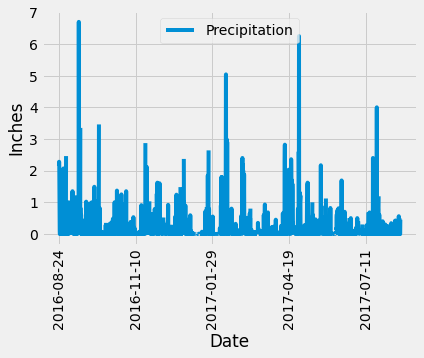

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores
start_date = dt.datetime(2016,8,23)

precipitation_dates = []
precipitation_scores = []
for row in session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > start_date).all():
    precipitation_dates.append(row[0])
    precipitation_scores.append(row[1])



# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame({
    "Date": precipitation_dates,
    "Precipitation": precipitation_scores
})

precipitation_df.set_index("Date", inplace=True)
# Sort the dataframe by date
precipitation_df.sort_index(ascending=True, inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precp_plot = precipitation_df.plot(rot=90, legend=True)
precp_plot.set_ylabel('Inches')




In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [23]:
stations_list = []
for station in session.query(Station.station):
    stations_list.append(station)
stations_list

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = []

for row in session.execute('SELECT station, COUNT(station) AS count FROM measurement GROUP BY station ORDER BY count DESC'):
    active_stations.append(row)
#print(active_stations)

most_active = active_stations[0][0]
print(most_active)

active_stations

USC00519281


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = Measurement.tobs
temperatures = session.query(Measurement.station,\
     func.min(temps), func.max(temps), func.avg(temps)).\
         filter_by(station = most_active)

for row in temperatures:
    print(row)

('USC00519281', 54.0, 85.0, 71.66378066378067)


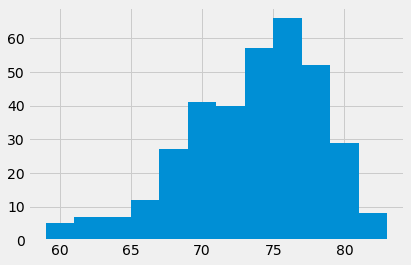

In [39]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months = session.query(Measurement.date, Measurement.station, temps).\
    filter(Measurement.date > start_date, Measurement.station == most_active)

dates = []
temp = []

for row in last_12_months:
    #print(row)
    dates.append(row[0])
    temp.append(row[2])

plt.hist(temp, bins=12)
plt.show()
#type(temp)

# Close session

In [ ]:
# Close Session
session.close()